## Capstone Project Proposal: MarsNet
<b>Automated Crater Detection on Mars (and beyond?)</b>
My proposed project is an iteration of the work documented in <a href='https://www.lpi.usra.edu/meetings/lpsc2010/pdf/1144.pdf'><I>Automatic Detection of Sub-km Craters using Shape and Texture Information</I></a> (2010 Bandiera et al.), which was expanded on in 2016 in <a href='https://arxiv.org/pdf/1601.00978.pdf'><I>Crater Detection via Convolutional Neural Networks</I></a> (2016 Cohen et al.) A most recent contribution by DeLatte et al., which will be the subject of a talk at the 49th Lunar and Planetary Science Conference in March, 2018, is presenting <a href='https://www.hou.usra.edu/meetings/lpsc2018/pdf/1948.pdf'>KerasCraterCNN</a>, a Keras implimentation of the same approach. The abstract of the presentation sites problems generalizing the model to new training sets.

## Project Proposal
This is an interesting project, motivated by the fact that even modern astronomy projects utilize "visual inspection" to get accurate crater counts and description (as mentioned by DeLatte et al. in 2018, "crater counting [is] a rite of passage for planetary geologists." This is a laborious and repetative task, arguably a misuse of the valuable time of expert astronomers.<br><br>
I am interested in creating a crater detection model with Keras that can provide more robust results on unseen planetary surfaces, and potentially creating a package that the Planetary Astronomy community can use without requiring a strong understanding of Python or Keras/Tensorflow

## Improving Model Robustness with Image Data Augmentation
Neural Nets benefit from lots of training samples, but in the case of crater detection is limited by the number of labeled images produced by expert planetary geologists. For Mars, the dataset listed here is the most comprehensive at the sub-km crater scale. Image augmentation is a common method for artificially expanding the value of a limited-size dataset.

I propose to expand on the work of DeLatte et al. with KerasCraterCNN by reproducing their model in Keras and improving on its performance on novel datasets (other types of Martian surfaces, other planetary surfaces) by use of industry-proven image data augmentation techniques. Specifically:
- image rotation
- zooming 


<br>Image data augmentation has shown to be an effective way of expanding the potency of hand-labeled data in training Nueral Nets (<I><a href='http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf'>The Effectiveness of Data Augmentation in Image Classification using Deep Learning</a></I>, Wang & Perez, 2017). Intuitively, rotation could help build model robustness to arbitrary camera orientations while zooming could help build model robustness to arbitrary-sized craters at different resolutions. With 360 degrees of rotation and multiple zoom values, the 

While some works aim to build robustness to models by specifying or explicitly detecting sun angles, this limits researchers by requiring explicit parameters. Automatic detection and robustness is an advantage of neural nets that I would like to leverage into building a useful model for planetary astronomy.

In [1]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tile_names = [
    'tile1_24',
    'tile1_25',
    'tile2_24',
    'tile2_25',
    'tile3_24',
    'tile3_25',
]
tiles = {}
craters = pd.read_csv('1_24_gt.csv', header=None)
craters.columns = ['x', 'y', 'd']

In [3]:
image_name = 'tile1_24'
img = PIL.Image.open(image_name + 's.pgm')

In [9]:
scale = .8
size = (int(img.size[0]*scale/80), int(img.size[1]*scale/80))

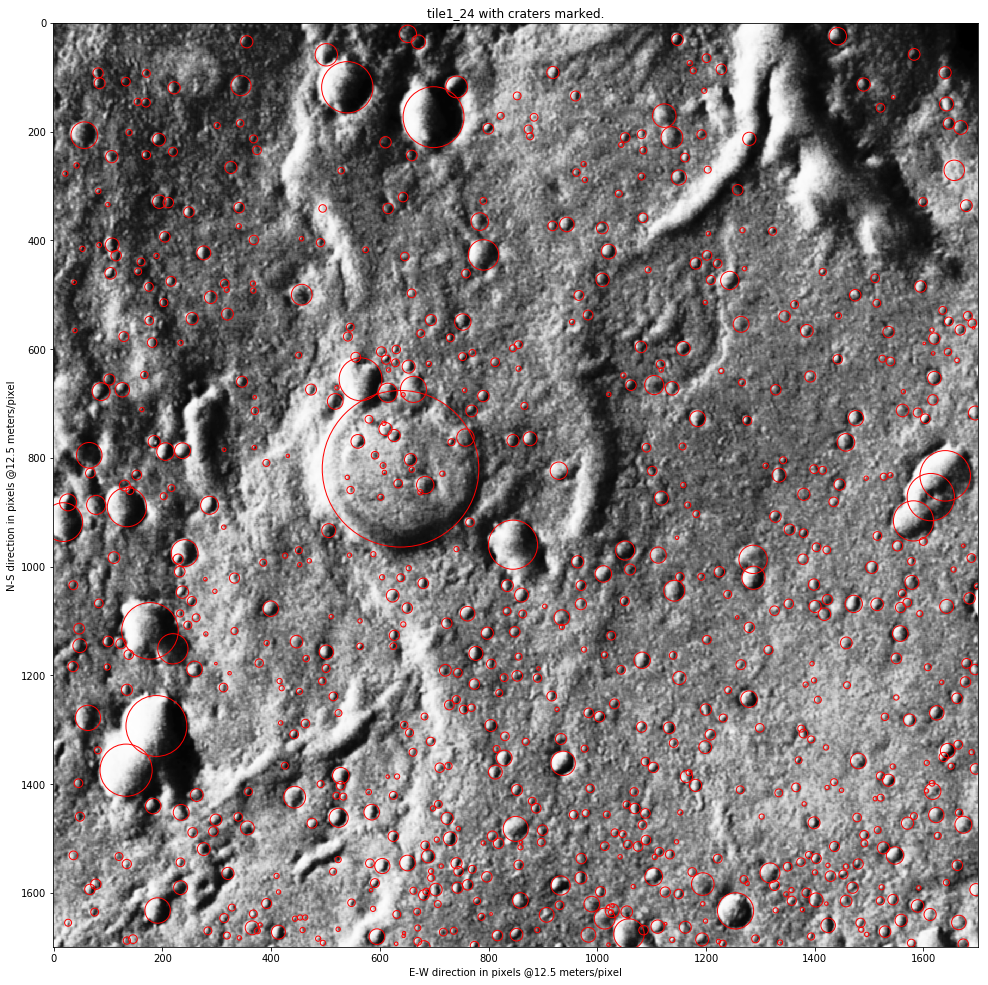

In [10]:
fig, ax = plt.subplots(figsize=size);
ax.imshow(np.array(img), cmap='Greys');
ax.set_title('{} with craters marked.'.format(image_name));
ax.set_ylabel('N-S direction in pixels @12.5 meters/pixel')
ax.set_xlabel('E-W direction in pixels @12.5 meters/pixel')
for idx in craters.index:
    crater = craters.loc[idx]
    x = crater['x']
    y = crater['y']
    r = crater['d']/2
    circle = plt.Circle((x, y), r, color='r', fill=False)
    ax.add_artist(circle)

In [14]:
true_proposals = pd.read_csv('./bandiera2010_candidates/1_24_tp.csv', header=None)
true_proposals.columns = craters.columns
false_proposals = pd.read_csv('./bandiera2010_candidates/1_24_tn.csv', header=None)
false_proposals.columns = craters.columns

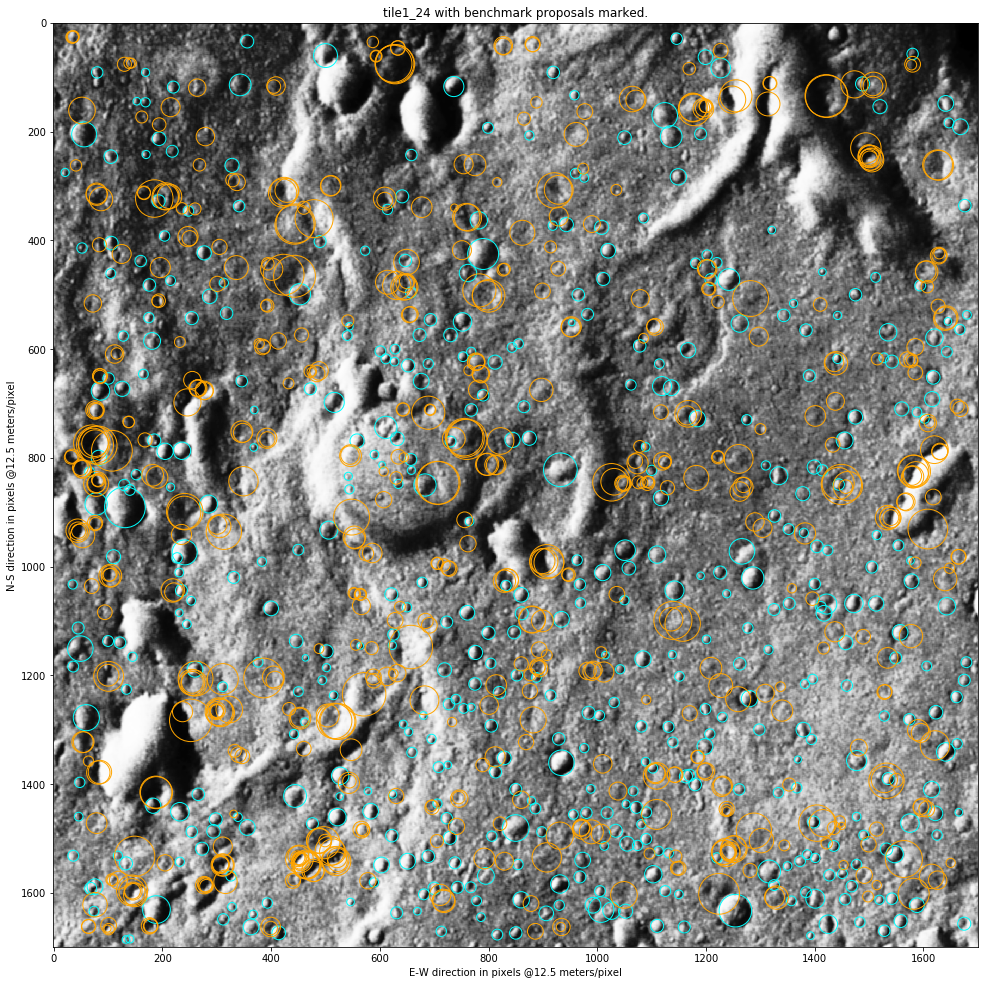

In [20]:
fig, ax = plt.subplots(figsize=size);
ax.imshow(np.array(img), cmap='Greys');
ax.set_title('{} with benchmark proposals marked.'.format(image_name));
ax.set_ylabel('N-S direction in pixels @12.5 meters/pixel')
ax.set_xlabel('E-W direction in pixels @12.5 meters/pixel')

for idx in true_proposals.index:
    crater = true_proposals.loc[idx]
    x = crater['x']
    y = crater['y']
    r = crater['d']/2
    circle = plt.Circle((x, y), r, color='cyan', fill=False)
    ax.add_artist(circle)
    
for idx in false_proposals.index:
    crater = false_proposals.loc[idx]
    x = crater['x']
    y = crater['y']
    r = crater['d']/2
    circle = plt.Circle((x, y), r, color='orange', fill=False)
    ax.add_artist(circle)

## Astronomy Product